In [6]:
# Imports
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [7]:
# Importing the input and target data sets
inputs = pd.read_csv('DataminingContest2009.Task2Inputs.Train.csv')
target = pd.read_csv('DataminingContest2009.Task2Targets.Train.csv')

# Dropping the two customer attribute columns as they won't provide value
inputs = inputs.drop(['custAttr1', 'custAttr2'], 1)

# Inputting the state missing value with the most common state
# inputs['state1'] = inputs['state1'].fillna(inputs['state1'].mode()[0])
inputs["zipstate"] = inputs["zip1"].map(str) + inputs["state1"]
inputs = inputs.drop(['zip1', 'state1'], 1)

Chi-Squared:
hour1 267.926425821
field2 25.646356204
hour2 263.869118468
flag1 103.818112265
field4 663.660093486
indicator1 36.6929471422
indicator2 145.306862749
flag2 69.9408515358
flag3 123.531752308
flag4 0.443587379131


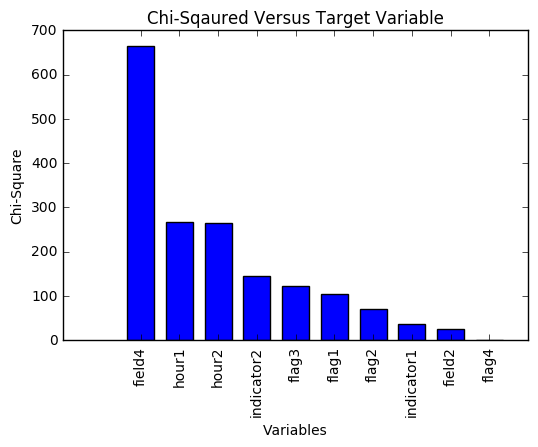

In [8]:
# Create a data frame of only categorical values for chi-squared test
categorical = inputs.drop(['amount', 'total', 'field3', 'flag5', 'zipstate', 'field1'], 1)

# Creating a chi-squared plot
chi = []
print('Chi-Squared:')
for column in categorical:
    try:
        # tab = pd.crosstab(index=numdf[target], columns=numdf[column])
        tab = pd.crosstab(target['fraud'], categorical[column])
    except KeyError:
        pass
    chi2 = chi2_contingency(tab)[0]
    chi.append(chi2)
    print(column, chi2)

indices = np.argsort(chi)[::-1]

columns= []
for i in indices:
        name = categorical.columns[i]
        if name != 'fraud':
            columns.append(name)
        else:
            columns.append(categorical.columns[i+1])
            # columns.append('status')

x = []
y = sorted(chi, reverse=True)
for i in range(len(y)):
    x.append(i)
plt.bar(x, y, width=0.7, align='center')
plt.xticks(x, columns, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Chi-Square')
plt.title('Chi-Sqaured Versus Target Variable')
plt.show()

C:\Users\Jonathan\AppData\Local\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature ranking:
1. field3 (0.163481)
2. zipstate (0.156707)
3. flag5 (0.150753)
4. field4 (0.129400)
5. hour1 (0.078521)
6. hour2 (0.077763)
7. total (0.061592)
8. field1 (0.060159)
9. amount (0.047911)
10. flag3 (0.022539)
11. field2 (0.014625)
12. flag2 (0.011945)
13. indicator1 (0.009316)
14. flag1 (0.008592)
15. indicator2 (0.003940)
16. flag4 (0.002757)


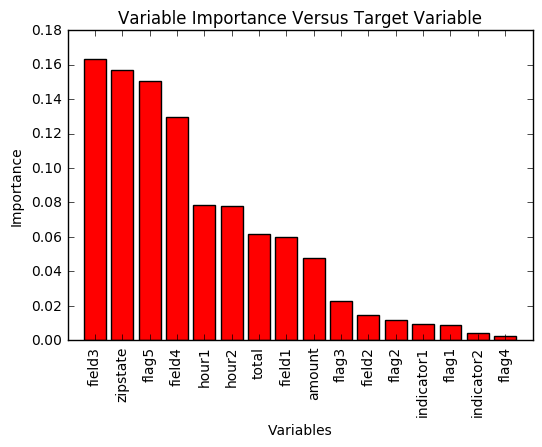

In [9]:
# Converting state values to integers
lbl = preprocessing.LabelEncoder()

lbl.fit(np.unique(list(inputs['zipstate'].values)))
inputs['zipstate'] = lbl.transform(list(inputs['zipstate'].values))

## Variable importance section
# Our variables for the classification task turned into numpy arrays(vectors?)
X = np.array(inputs)
y = np.array(target)

# Build a decision tree and compute the variables importances
clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# clf = DecisionTreeClassifier(random_state=0)

# Fitting the decision tree
clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
columns = []
for i in indices:
    name = inputs.columns[i]
    columns.append(name)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Variable Importance Versus Target Variable")
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.bar(range(X.shape[1]), importances[indices], color='r', align="center")
plt.xticks(range(X.shape[1]), columns, rotation='90')
plt.xlim([-1, X.shape[1]])
plt.show()